Research Based Learning Komputasi dalam Sains Atmosfer dan Keplanetan Kelompok 2 Pada Colab ini kita akan melakukan sebuah simulasi n-benda menggunakan modul rebound. kita akan mencoba melakukan simulasi sebuah komet yang mengorbit pusat tata surya kita, nantinya komet tersebut akan kita bandingkan orbitnya dengan beberapa planet komet tersebut adalah: 109P/Swift-Tuttle dan akan kita bandingkan dengan orbit Neptunus dan Mars

In [ ]:
#untuk melakukan simulasi n-benda
#harus menginstall dulu modul rebound
#install modul rebound setiap reload page
!pip install rebound

     |████████████████████████████████| 243 kB 8.4 MB/s 
  Created wheel for rebound: filename=rebound-3.18.0-cp37-cp37m-linux_x86_64.whl size=577844 sha256=0648ffa119a4821ef74c6a17d9618b4f87223b4c6ea33480f512e338bac9d7aa
  Stored in directory: /root/.cache/pip/wheels/87/4a/3c/c7875f0b2ef543d3b8742c4fa2fe122f4024c8d58a7ff605a5
Successfully built rebound


In [ ]:
#import rebound dan library yang diperlukan sebelum digunakan
import rebound
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import numpy as np
#buat plot di dalam tab ini
%matplotlib inline
sim1 = rebound.Simulation() #buat simulasi baru sim1
sim1.integrator = "ias15" #menggunakan integrator ias15
#menentukan objek yaitu: Matahari, Jupiter, Bumi, Saturnus, dan 109P
sim1.add("Sun")
sim1.add("Jupiter")
sim1.add("Earth")
sim1.add("Saturn")

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')
Searching NASA Horizons for 'Earth'... 
Found: Earth-Moon Barycenter (3) (chosen from query 'Earth')
Searching NASA Horizons for 'Saturn'... 
Found: Saturn Barycenter (6) (chosen from query 'Saturn')


In [ ]:
sim1.add("NAME=Swift-Tuttle; CAP")

Searching NASA Horizons for 'NAME=Swift-Tuttle; CAP'... 
Found: 109P/Swift-Tuttle 


/usr/local/lib/python3.7/dist-packages/rebound/horizons.py:146: RuntimeWarning: Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.
  warnings.warn("Warning: Mass cannot be retrieved from NASA HORIZONS. Set to 0.", RuntimeWarning)


In [ ]:
#untuk melihat status benda langit
sim1.status()
#kita langsung dapat menemukan informasi orbit objek langit
for orbit in sim1.calculate_orbits():
    print(orbit)

---------------------------------
REBOUND version:     	3.18.0
REBOUND built on:    	Oct 15 2021 15:47:53
Number of particles: 	5
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.particle.Particle object at 0x7f09cf99f320, m=0.9999999999950272 x=-0.008285639874726346 y=0.003989874757863598 z=0.00016106556269764475 vx=-0.00024973062543270447 vy=-0.00047301596142846817 vz=9.633155455057934e-06>
<rebound.particle.Particle object at 0x7f09cf99f710, m=0.0009547919099366768 x=4.414205875068082 y=-2.349169028521391 z=-0.0890107830345789 vx=0.20077432933621872 vy=0.4078667258333934 vz=-0.006183832138318807>
<rebound.particle.Particle object at 0x7f09cf99f320, m=3.0404326489511185e-06 x=0.9147934448746234 y=0.3809153272886909 z=0.0001394722943185369 vx=-0.39458602511459134 vy=0.9216908764770945 vz=-3.331896966889188e-05>
<rebound.particle.Particle object at 0x7f09cf99f710, m=0.0002858856700231729 x

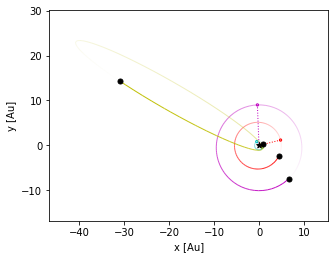

In [ ]:
#membuat plot simulasi orbit Jupiter dan Komet
fig, ax = rebound.OrbitPlot(sim1, color=True, periastron=True, fancy=False, unitlabel="[Au]")

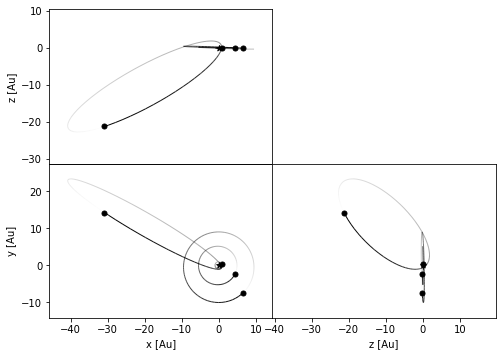

In [ ]:
#bagian ini adalah plot orbit 3 dimensi
fig = rebound.OrbitPlot(sim1,slices=1,xlim=[-5.,5],ylim=[-5.,5], unitlabel='[Au]')

In [ ]:
sim1.dt = -0.01       #menghitung mundur
Noutputs = 10000
year = 2.*np.pi       # Satu tahun pada unit dimana G = 1
times = np.linspace(0.,-100.*year, Noutputs)
# 0 hingga 100 tahun ke belakang
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

sim1.move_to_com() #pindah ke pusat momentum
ps = sim1.particles

for i,time in enumerate(times):
    sim1.integrate(time)
    x[0][i] = ps[1].x #menyimpan data untuk diplot
    y[0][i] = ps[1].y
    z[0][i] = ps[1].z
    x[1][i] = ps[4].x
    y[1][i] = ps[4].y
    z[1][i] = ps[4].z

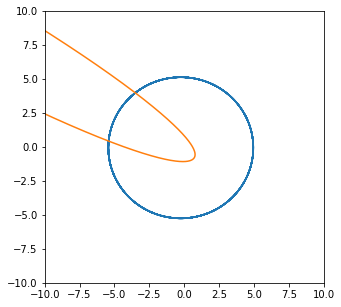

In [ ]:
#visualisasi
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-10,10])
ax.set_ylim([-10,10])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

Jarak terdekat (1.849697 AU) akan terjadi pada waktu: -30.343034 tahun.


'Yaitu pada tanggal 1991-06-12'

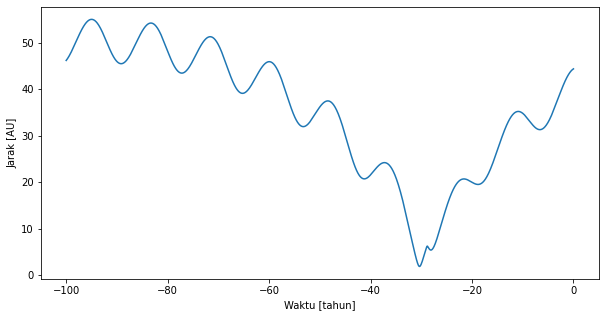

In [ ]:
#membuat plot jarak terdekat komet tersebut lagi
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel("Waktu [tahun]")
ax.set_ylabel("Jarak [AU]")
#menghitung jarak 3 dimensi antara objek 0 dan 1 (jupiter dan komet)
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Jarak terdekat (%f AU) akan terjadi pada waktu: %f tahun." % (np.min(distance),closeencountertime))
import datetime
encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("Yaitu pada tanggal %Y-%m-%d")

In [ ]:
#Menghitung jarak terdekat Saturnus dengan 109P
sim1.dt = 0.01
#perhitungan
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,150.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

#pindah ke pusat momentum
sim1.move_to_com()
ps = sim1.particles

for i,time in enumerate(times):
    sim1.integrate(time)
#menyimpan data untuk diplot
    x[0][i] = ps[3].x
    y[0][i] = ps[3].y
    z[0][i] = ps[3].z
    x[1][i] = ps[4].x
    y[1][i] = ps[4].y
    z[1][i] = ps[4].z

Jarak terdekat (1.323805 AU) akan terjadi pada waktu: 102.370237 tahun.


'Yaitu pada tanggal 2124-02-29'

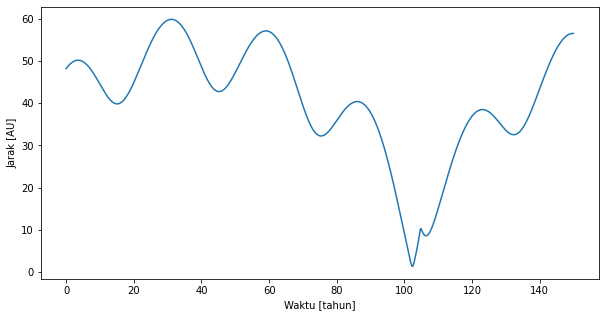

In [ ]:
#membuat plot jarak terdekat komet tersebut lagi
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel("Waktu [tahun]")
ax.set_ylabel("Jarak [AU]")
#menghitung jarak 3 dimensi antara objek 0 dan 1 (jupiter dan komet)
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Jarak terdekat (%f AU) akan terjadi pada waktu: %f tahun." % (np.min(distance),closeencountertime))
import datetime
encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("Yaitu pada tanggal %Y-%m-%d")

In [ ]:
#Menghitung jarak terdekat Bumi dengan 109P
sim1.dt = 0.01
#perhitungan
Noutputs = 10000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,150.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))
z = np.zeros((2,Noutputs))

#pindah ke pusat momentum
sim1.move_to_com()
ps = sim1.particles

for i,time in enumerate(times):
    sim1.integrate(time)
#menyimpan data untuk diplot
    x[0][i] = ps[2].x
    y[0][i] = ps[2].y
    z[0][i] = ps[2].z
    x[1][i] = ps[4].x
    y[1][i] = ps[4].y
    z[1][i] = ps[4].z

Jarak terdekat (0.101792 AU) akan terjadi pada waktu: 104.815482 tahun.


'Yaitu pada tanggal 2126-08-10'

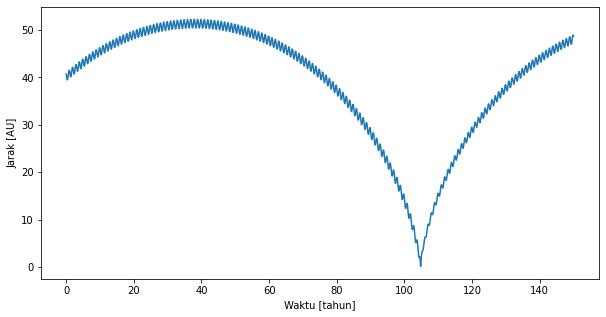

In [ ]:
#membuat plot jarak terdekat komet tersebut lagi
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.set_xlabel("Waktu [tahun]")
ax.set_ylabel("Jarak [AU]")
#menghitung jarak 3 dimensi antara objek 0 dan 1 (jupiter dan komet)
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1])+np.square(z[0]-z[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Jarak terdekat (%f AU) akan terjadi pada waktu: %f tahun." % (np.min(distance),closeencountertime))
import datetime
encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("Yaitu pada tanggal %Y-%m-%d")

In [ ]:
sim1.cite()

Simulations in this paper made use of the REBOUND N-body code \citep{rebound}. The simulations were integrated using IAS15, a 15th order Gauss-Radau integrator \citep{reboundias15}. 


@ARTICLE{rebound,
       author = {{Rein}, H. and {Liu}, S. -F.},
        title = "{REBOUND: an open-source multi-purpose N-body code for collisional dynamics}",
      journal = {\aap},
     keywords = {methods: numerical, planets and satellites: rings, protoplanetary disks, Astrophysics - Earth and Planetary Astrophysics, Astrophysics - Instrumentation and Methods for Astrophysics, Mathematics - Dynamical Systems, Physics - Computational Physics},
         year = 2012,
        month = jan,
       volume = {537},
          eid = {A128},
        pages = {A128},
          doi = {10.1051/0004-6361/201118085},
archivePrefix = {arXiv},
       eprint = {1110.4876},
 primaryClass = {astro-ph.EP},
       adsurl = {https://ui.adsabs.harvard.edu/abs/2012A&A...537A.128R},
      adsnote = {Provided by the SAO/NASA A